We will conduct a sentiment analysis on the Elon Musk's tweets before and after he became the CEO of Twitter.

1)In order to be able to do this we will need the following libraries:
Re →  for cleaning the tweets
NLTK →  for removing stop words
Numpy →  for processing image
Pandas →  for handling extracted data
Textblob →  for sentiment analysis
Wordcloud →  for plotting word cloud
Tweepy →  for Twitter API authorization and extracting tweets from it
Matplotlib →  for visualization.

In [27]:
!pip install re 
!pip install nltk
!pip install tweepy
!pip install numpy 
!pip install pandas 
!pip install textblob 
!pip install matplotlib
!pip install wordcloud 
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


2)Import the previous installed libraries

In [28]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


3)Making use of Twitter API

In [29]:
TWITTER_API_KEY = "8r4bvIuCRsNzrbdPsCqaUoVv9"
TWITTER_API_SECRET = "JptZjnN991736aSssz4F8RUaOPtTHEOejNyDGb064KAjPJ2GMU"
TWITTER_ACCESS_TOKEN = "1297797286148399104-JTeBfDEIMD5xDmuzgtmiOcJMrurhFx"
TWITTER_ACCESS_SECRET = "FmJFEJjFiJEMMRAHenXe1dCNpPD6lz02mKuZVMzBP9b7c"

#Authentificate with Twitter
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
 
#Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

4)Get Elon Musk's tweets, before and after he became the CEO of Twitter. The data was saved in a JSON file in case Twitter API crashes or is not available at the moment.

4.1) Before Elon Musk

In [30]:
#before_query = 'elonmusk -start-time:2021-01-01 -end-time:2022-10-26'  

#resultsBeforeElon = tweepy.Cursor(api.search_tweets, q=before_query, lang='en', tweet_mode='extended').items(2000)

# creating json files containing the mined tweets
#with open("data_before_Elon_Musk.json", "w") as f_before:
#    json.dump([tweet.full_text for tweet in resultsBeforeElon], f_before)


In [31]:
# See how many tweets we actually mined
f_before = open("data_before_Elon_Musk.json")
data_before = json.load(f_before)
f_before.close()
len(data_before)

2000

In [32]:
# add the tweets in a dataframe
df_before = pd.DataFrame(data_before, columns=['Tweets'])  

In [33]:
# see a sample of the optained tweets before Elon Musk
df_before.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_10932/1079387593.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
705,"@elonmusk , you are the ONLY GOTAWAY!!! \nStay safe. https://t.co/iWUABj44u5"
280,@jordanbpeterson @elonmusk They really need to update the report function.
1064,RT @muskQu0tes: “I am selling almost all physical possessions. Will own no house.” @elonmusk
1350,"@DsMusketeer @paststat @elonmusk What happened exsctly, i mean why it was suspended."
1681,"@elonmusk The White House press secretary continues to say that hate tweets are up on Twitter since you took over, who's telling the truth?"


4.2) After Elon Musk

In [34]:
#after_query = 'elonmusk -start-time:2022-10-27' 

#resultsAfterElon = tweepy.Cursor(api.search_tweets, q=after_query, lang='en', tweet_mode='extended').items(2000)

# creating json files containing the mined tweets
#with open("data_after_Elon_Musk.json", "w") as f_after:
#    json.dump([tweet.full_text for tweet in resultsAfterElon], f_after)

In [35]:
# See how many tweets we actually mined
f_after = open("data_after_Elon_Musk.json")
data_after = json.load(f_after)
f_after.close()
len(data_after)

2000

In [36]:
# add the tweets in a dataframe
df_after = pd.DataFrame(data_after, columns=['Tweets'])  

In [37]:
# see a sample of the optained tweets after Elon Musk
df_after.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_10932/2848080920.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1622,RT @djohnstonpax: @GerberKawasaki If @elonmusk cared more about T$LA shareholders then he’d have a PR dept to manage the FUD.
112,"@Canadia64857959 @Pattrick_W_Sims @LolaGarcia13 @JavonAPrice @greg_price11 @elonmusk And how did they do that? Was it by asking Twitter moderators to check certain tweets to see if they breached ToS, just like, as the Twitter file said, the Republicans were doing as well?"
490,@alexbruesewitz @elonmusk This is how all federal investigations have been conducted latley... suddenly Elon has more in common w Trump than ge ever thought
368,RT @SteveHiltonx: We heard about “Russia collusion” on every TV station for years. \n\nNow @elonmusk has exposed blatant Democrat campaign co…
1714,Is it worth it @elonmusk for some stupid neuralink implant for humans? At the end of your life do you really want this to be your legacy? https://t.co/luyX3P8pH7


5)Cleaning the tweets. We will remove from the tweets using regex + re library any URL links, mentions or any elements in a tweet that are irrelevant ot the sentiment analysis.

In [38]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) # remove tag(@)
  tweets = re.sub('#[A-Za-z0–9]+', '', tweets) # remove hashtags(#)
  tweets = re.sub('RT[\s]+', '', tweets) # remove RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # remove URL links
  tweets = re.sub('\[(.*?)\]', '', tweets) #remove fonts and writing styles, e.g. [$lt...$gt]
  return tweets

Applying the previously implemented regex to our tweets lists: before and after Elon Musk

In [39]:
df_before.Tweets = df_before.Tweets.apply(clean_tweets)
df_after.Tweets = df_after.Tweets.apply(clean_tweets)

# see a sample of the resulted cleaned tweets
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_10932/3330001544.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1711,Maybe cure cancer🤷‍♂️it seem to kill a new celebrity every day…can I have their check mark for the rest of the month?
460,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…
89,@8Dollars14 _tree_frog _dore Bullshit. Nothing was happening to them before Russia invaded in 2014.
1888,": This phrase is absolutely TRUE: ""If wars can be started by lies, peace can be started by truth."" I hope shares ever…"
1792,5Tan The first photo looks a LOT like an actor but can’t think of his name (not nick nolte). Picture him with short hair and clean cut


In [40]:
# export the cleaned tweets to csv files
df_before.to_csv("clean_data_before_Elon_Musk.csv")
df_after.to_csv("clean_data_after_Elon_Musk.csv")

6) Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [41]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Tweets,Subjectivity,Polarity
0,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…,0.00,0.000
1,": He can try all he wants, in the meantime I will block them all. No more engagement with MAGA-…",0.30,-0.025
2,: “I was concerned because I saw Biden talking about wanting a national security review of ! One has to wonder if…,0.00,0.000
3,"This is her totally, keep vigilant 🙏🏻",0.75,0.000
4,The corruption is so obvious at this point - it would be laughable if it weren’t so terrifying. Where are all the people who spent ‘16-‘20 screeching about an authoritarian regime?,0.65,-0.400


In [42]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Tweets,Subjectivity,Polarity
0,"182 376 You don't have to be 'sticking up' for someone to understand and apply logic. Turn your comment around, you've got to be against the evil billionaire? loser..",1.000000,-1.000000
1,Of course you can.,0.000000,0.000000
2,@240gordymacd 1 Yeah yeah. I’m sure you believe that everyone that voted for Trump are cultists too huh?,0.888889,0.500000
3,_levy: NEW from me: 's is under federal investigation for potential violations of animal welfare laws amid…,0.727273,0.068182
4,more gaslighting...,0.500000,0.500000


7) Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

7.1) Before Elon Musk

In [43]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…,0.00,0.000,Neutral
1,": He can try all he wants, in the meantime I will block them all. No more engagement with MAGA-…",0.30,-0.025,Negative
2,: “I was concerned because I saw Biden talking about wanting a national security review of ! One has to wonder if…,0.00,0.000,Neutral
3,"This is her totally, keep vigilant 🙏🏻",0.75,0.000,Neutral
4,The corruption is so obvious at this point - it would be laughable if it weren’t so terrifying. Where are all the people who spent ‘16-‘20 screeching about an authoritarian regime?,0.65,-0.400,Negative


7.2) After Elon Musk

In [44]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,"182 376 You don't have to be 'sticking up' for someone to understand and apply logic. Turn your comment around, you've got to be against the evil billionaire? loser..",1.000000,-1.000000,Negative
1,Of course you can.,0.000000,0.000000,Neutral
2,@240gordymacd 1 Yeah yeah. I’m sure you believe that everyone that voted for Trump are cultists too huh?,0.888889,0.500000,Positive
3,_levy: NEW from me: 's is under federal investigation for potential violations of animal welfare laws amid…,0.727273,0.068182,Positive
4,more gaslighting...,0.500000,0.500000,Positive


7.3) The ratio of the sentiment in both situations (Before and After Elon Musk) by using scatter plot, pie plot, bar plot

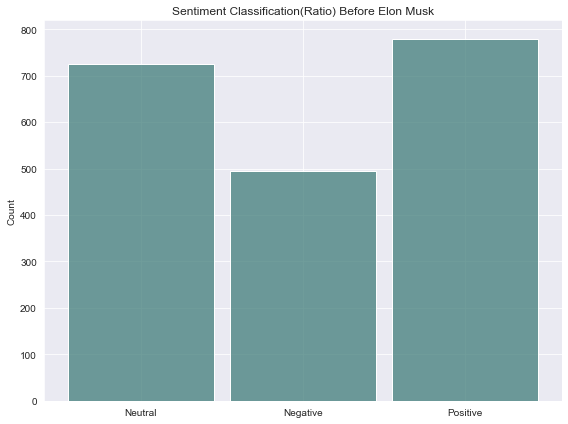

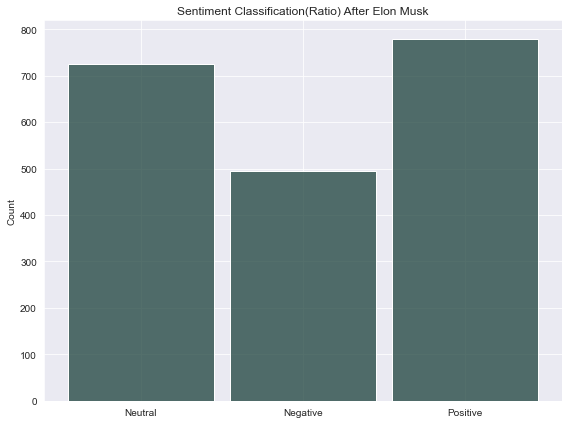

In [45]:
#The ratio of the sentiment before Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_before, x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) Before Elon Musk')
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_before, x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) After Elon Musk')
plt.tight_layout()

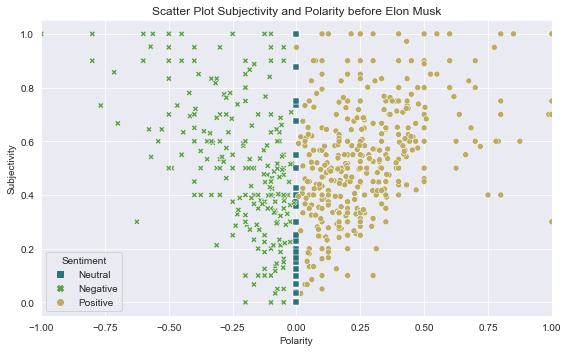

In [46]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

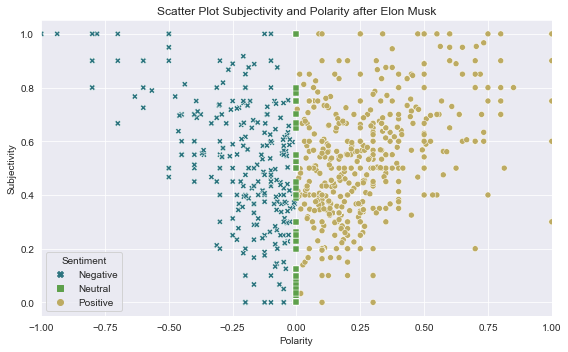

In [47]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

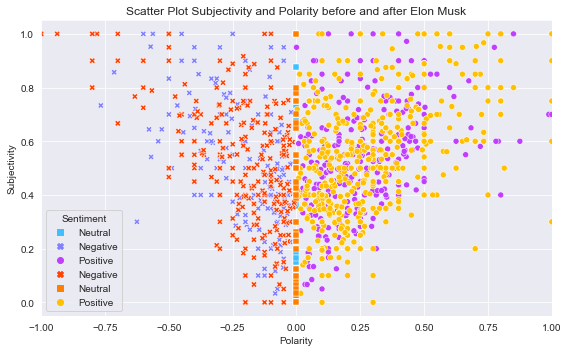

In [48]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



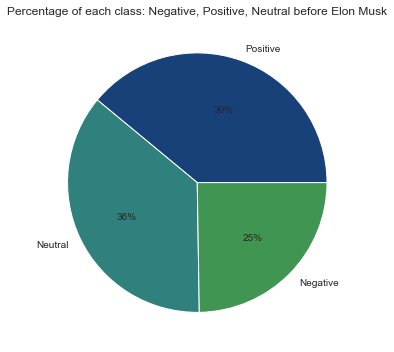

In [49]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral before Elon Musk')
plt.tight_layout()


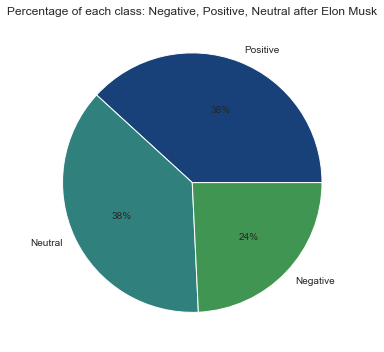

In [50]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral after Elon Musk')
plt.tight_layout()